# The Result of Stack Overflow Developer Survey, 2017

Learning insights of The Stack Overflow Developer Survey, 2017 as follows:
1. General information.
2. User response comparison.
3. Correlation of data prediction.

#### 1. Import libary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
%matplotlib inline

#### 2. Load data

Get the result from file **".CSV"** . at [Stack Overflow Developer Survey, 2017](https://www.kaggle.com/stackoverflow/so-survey-2017) using the data as follows:

1. survey_results_public.csv (Compute the data).
2. survey_results_schema.csv (Get the meaning of columns as public file).
    
Create DataFrame to keep data in **df1** and **df2**, respectively.

In [2]:
df1 = pd.read_csv('Data/survey_results_public.csv')
df2 = pd.read_csv('Data/survey_results_schema.csv')

Check the result of **survey_results_public.csv** in 5 rows by using code `.head()`

In [3]:
df1.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the result of **survey_results_schema** in 5 rows by using code `.head()`

In [4]:
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Set index of **df2** is Column and instead by `inplace=True`.

In [5]:
df2.set_index('Column', inplace=True)

Show the result after instead index.

In [6]:
df2.head()

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."


How to check the meaning of column in **df1** from **df2**

In [7]:
x = 'FormalEducation'
df2['Question'][x]

"Which of the following best describes the highest level of formal education that you've completed?"

Check number of rows and columns by using `.shape`.
- `.shape[0]` is rows.
- `.shape[1]` is colums.

In [8]:
print("df1.shape is", df1.shape)
print("df1.shape[0] is", df1.shape[0])
print("df1.shape[1] is", df1.shape[1])

df1.shape is (51392, 154)
df1.shape[0] is 51392
df1.shape[1] is 154


Setting index of **df1** is Respondent as this,

In [9]:
df1.set_index('Respondent', inplace=True)

In [10]:
df1.head(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


## 1. General information.

#### 1.1 Ploting the data in Stack Overflow Developer Survey, 2017

Create function for the barh plot. 

In [11]:
def stck_data(col):
    
    #Get the meaning of columns from df2.
    x = df2['Question'][col]
    
    #Clearnning the data is "NAN".
    df1[col].dropna(axis=0)
    plt.figure(facecolor='white')
    #Create a graph.
    df_plot = (df1[col].value_counts()/df1[col].shape[0]).plot(kind='barh',legend=True);
    
    #Create title of a graph use the meaning of columns from df2 which keep in x.
    df_plot = plt.title(x)

    return df_plot

**Prefessional** : Displays the result of Prefessional as a barh graph type by using `stck_data(col)` function.

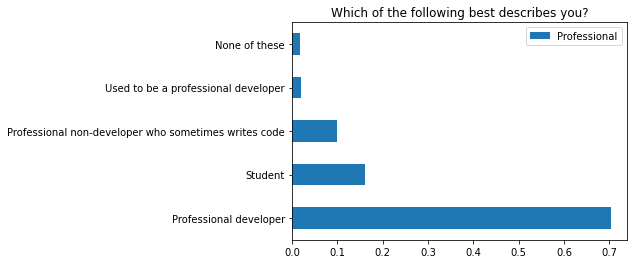

In [12]:
stck_data('Professional')
plt.savefig('Picture/Professional.png', facecolor='white', dpi=500 , bbox_inches='tight')

**EmploymentStatus** : Displays the result of Prefessional as a barh graph type by using `stck_data(col)` function.

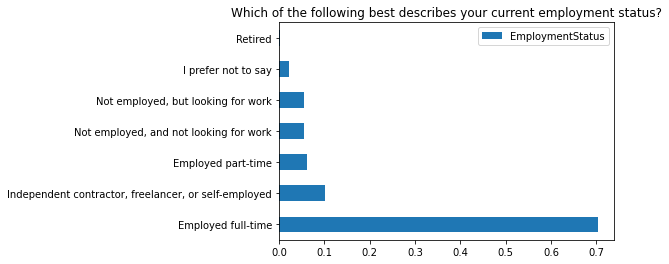

In [13]:
stck_data('EmploymentStatus')
plt.savefig('Picture/EmploymentStatus.png', facecolor='white', dpi=500 , bbox_inches='tight')

**FormalEducation** : Displays the result of Prefessional as a barh graph type by using `stck_data(col)` function.

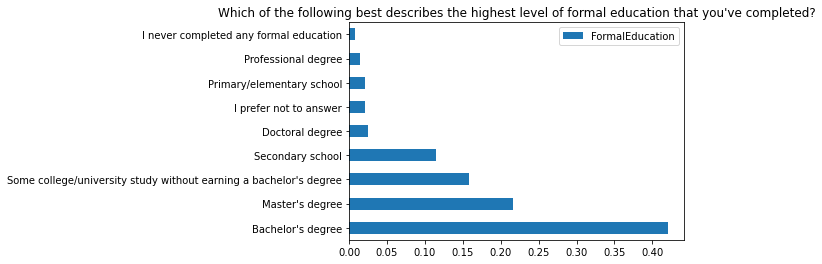

In [14]:
stck_data('FormalEducation')
plt.savefig('Picture/FormalEducation.png', facecolor='white', dpi=500 , bbox_inches='tight')

**CompanySize** : Displays the result of Prefessional as a barh graph type by using `stck_data(col)` function.

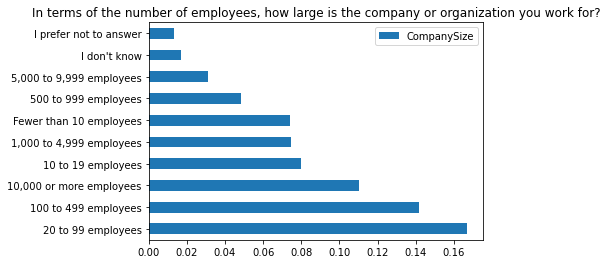

In [15]:
stck_data('CompanySize')
plt.savefig('Picture/CompanySize.png', facecolor='white', dpi=500 , bbox_inches='tight')

**CompanyType** : Displays the result of Prefessional as a barh graph type by using `stck_data(col)` function.

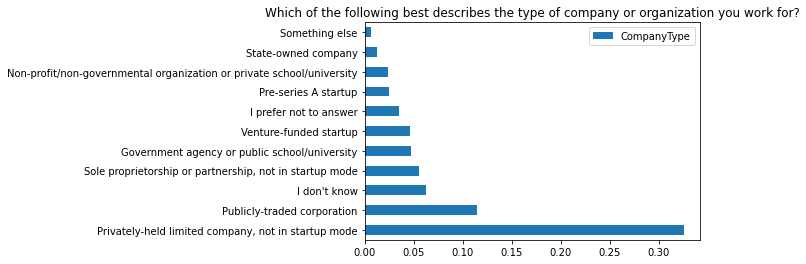

In [16]:
stck_data('CompanyType')
plt.savefig('Picture/CompanyType.png', facecolor='white', dpi=500 , bbox_inches='tight')

#### 1.2 Calculating the average of float and integer variables.

Check *float* and *int* types in columns of df1 data.

In [17]:
df1.select_dtypes(include=['float', 'int']).columns

Index(['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction', 'Salary', 'ExpectedSalary'],
      dtype='object')

According to the code above, I receives 6 columns as *float* and *int* types. However, I'm not understand the mean of the columns. Therefore, I'm using **df2** for see the meaning of each columns.

In [18]:
print('CareerSatisfaction is', df2['Question']['CareerSatisfaction'])
print('JobSatisfaction is', df2['Question']['JobSatisfaction'])
print('HoursPerWeek is', df2['Question']['HoursPerWeek'])
print('StackOverflowSatisfaction is', df2['Question']['StackOverflowSatisfaction'])
print('Salary is', df2['Question']['Salary'])
print('ExpectedSalary is', df2['Question']['ExpectedSalary'])

CareerSatisfaction is Career satisfaction rating
JobSatisfaction is Job satisfaction rating
HoursPerWeek is During a typical week, approximately how many hours do you spend on activities related to finding new job opportunities?Please adjust the slider to the appropriate number of hours. The box to the right will indicate the number of hours you have chosen.
StackOverflowSatisfaction is Stack Overflow satisfaction
Salary is What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?
ExpectedSalary is You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?


Create DataFrame to keep the float and integer data for compute in the mathematically.

In [19]:
df1_nums = df1[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek','StackOverflowSatisfaction', 'Salary', 'ExpectedSalary']]
df1_nums.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Respondent,,,,,,
1,NaN,NaN,0.0,9.0,NaN,NaN
2,NaN,NaN,NaN,8.0,NaN,37500.0
3,8.0,9.0,NaN,8.0,113750.0,NaN
4,6.0,3.0,5.0,10.0,NaN,NaN
5,6.0,8.0,NaN,NaN,NaN,NaN


According the the above result, found that some rows are NAN, replace with mean as follows:

In [20]:
print('Mean CareerSatisfaction: {0:0.2f}'.format(df1_nums['CareerSatisfaction'].mean()))
print('Mean JobSatisfaction: {0:0.2f}'.format(df1_nums['JobSatisfaction'].mean()))
print('Mean HoursPerWeek: {0:0.2f}'.format(df1_nums['HoursPerWeek'].mean()))
print('Mean StackOverflowSatisfaction: {0:0.2f}'.format(df1_nums['StackOverflowSatisfaction'].mean()))
print('Mean Salary: {0:0.2f}'.format(df1_nums['Salary'].mean()))
print('Mean ExpectedSalary: {0:0.2f}'.format(df1_nums['ExpectedSalary'].mean()))

Mean CareerSatisfaction: 7.30
Mean JobSatisfaction: 6.96
Mean HoursPerWeek: 3.95
Mean StackOverflowSatisfaction: 8.43
Mean Salary: 56298.48
Mean ExpectedSalary: 33142.22


In [21]:
for var in df1_nums:
    df1_nums[var].fillna(df1_nums[var].mean(), inplace=True)

/Users/natnareephoungsombat/opt/anaconda3/envs/DataTest/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
df1_nums.head()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
Respondent,,,,,,
1,7.300574,6.957078,0.000000,9.000000,56298.480641,33142.220468
2,7.300574,6.957078,3.952282,8.000000,56298.480641,37500.000000
3,8.000000,9.000000,3.952282,8.000000,113750.000000,33142.220468
4,6.000000,3.000000,5.000000,10.000000,56298.480641,33142.220468
5,6.000000,8.000000,3.952282,8.429875,56298.480641,33142.220468


Compute the data using code `.describe()`.

In [23]:
df1_nums.describe()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000,51392.000000
mean,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,1.782319,1.921331,4.789305,1.173429,19973.212952,6738.675193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,2.000000,8.000000,56298.480641,33142.220468
50%,7.300574,7.000000,3.952282,8.429875,56298.480641,33142.220468
75%,8.000000,8.000000,3.952282,9.000000,56298.480641,33142.220468
max,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


#### 1.3 Calculate the frequency of the data.

Get the result from file **survey_results_public.csv**

In [24]:
df1 = pd.read_csv('Data/survey_results_public.csv')
df1.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


Create variable keep counts of **ImportantBenefits** columns in df1

In [25]:
Imp_Benf_vals = df1['ImportantBenefits'].value_counts()
Imp_Benf_vals = Imp_Benf_vals/df1.shape[0]
Imp_Benf_vals.head(2)

None of these                                                                          0.012706
Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options    0.007063
Name: ImportantBenefits, dtype: float64

Show the result by bar plot.

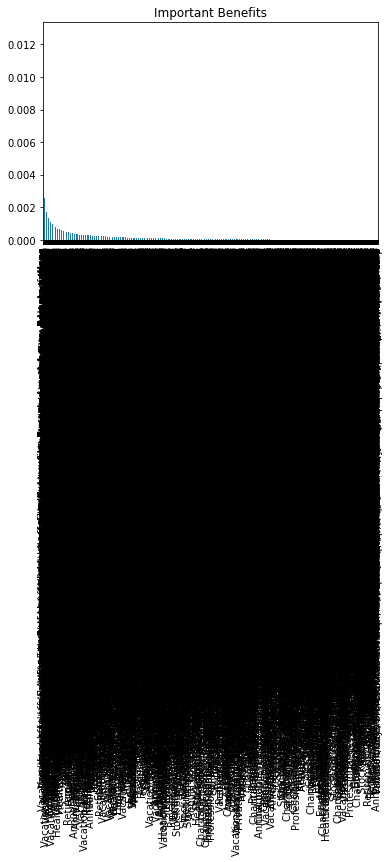

In [26]:
Imp_Benf_vals.plot(kind="bar");
plt.title("Important Benefits");

According to the result above, the data is not clean to see more visualization. Therefore, it is necessary to clean the data before displaying it.

- a. ImportantBenefits.
- b. StackOverflowDevices.
- c. JobProfile.

**a. Important Benefits** of Stack Overflow with users.

In [27]:
# The data in ImportantBenefits.
set(df1['ImportantBenefits'].values)


# The results of the data in "ImportantBenefits" columns.
possible_vals = ["Annual bonus", "Charitable match", "Child/elder care", "Education sponsorship",
                 "Equipment", "Expected work hours", "Health benefits", "Long-term leave",
                 "Meals", "None of these", "Private office", "Professiol development sponsorship",
                 "Professional development sponsorship", "Remote options", "Retirement", "Stock options",
                 "Vacation/days off", "Other"]


# Function compute of the Important Benefits data.
def clean_and_plot(df1, title='Important Benefits', plot=True):
    '''
    INPUT 
        df - a dataframe holding the ImportantBenefits column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the ImportantBenefits column.
    '''
    
    # Create DataFrame.
    benefits = df1['ImportantBenefits'].value_counts().reset_index()
    benefits.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)
    
    # Import libary.
    from collections import defaultdict
    benefits_df = defaultdict(int)

    # Value counts in the ImportantBenefits columns.
    for val in possible_vals:
        for idx in range(benefits.shape[0]):
            if val in benefits['Benefits'][idx]:
                benefits_df[val] += int(benefits['count'][idx])
    
    # Data setting.
    benefits_df = pd.DataFrame(pd.Series(benefits_df)).reset_index()
    benefits_df.columns = ['Benefits', 'count']
    benefits_df.sort_values('count', ascending=False, inplace=True)
    benefits_df.set_index('Benefits', inplace=True)

    # Graph plotting.
    if plot:
        (benefits_df/benefits_df.sum()).plot(kind='bar', legend=True);
        plt.title(title);
        plt.savefig('Picture/benefits_df.png', facecolor='white', dpi=500 , bbox_inches='tight')
        
    # Ratio.
    props_benefits = benefits_df/benefits_df.sum()
    
    return props_benefits

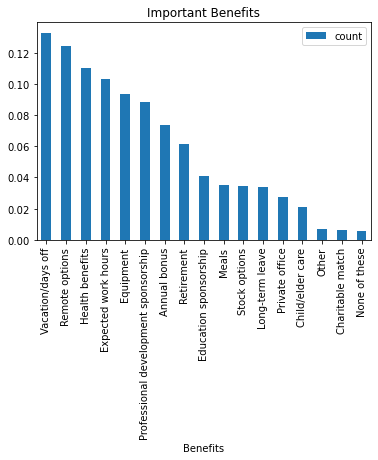

In [28]:
# Function a bar plot of 'Important Benefits'
props_df = clean_and_plot(df1)


**b. Stack Overflow Devices** with users.

In [29]:
# The data in StackOverflowDevices.
set(df1['StackOverflowDevices'].values)


# The results of the data in "StackOverflowDevices" columns.
stack_devs_vals = ["Android app", "Android browser", "iOS app", "iOS browser", "Desktop", "Other phone browser"]


# Function compute of the Stack Overflow Devices data.
def clean_and_plot_Devs(df1, title='Stack Overflow Devices', plot=True):
    '''
    INPUT 
        df - a dataframe holding the StackOverflowDevices column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the StackOverflowDevices column.
    '''
    
    # Create DataFrame.
    df1_stack_devs = df1['StackOverflowDevices'].value_counts().reset_index()
    df1_stack_devs.rename(columns={'index': 'Devices', 'StackOverflowDevices': 'count'}, inplace=True)
    
    # Import libary.
    from collections import defaultdict
    df1_stack_devs_df = defaultdict(int)

    # Value counts in the StackOverflowDevices columns.
    for val in stack_devs_vals:
        for idx in range(df1_stack_devs.shape[0]):
            if val in df1_stack_devs['Devices'][idx]:
                df1_stack_devs_df[val] += int(df1_stack_devs['count'][idx])
    
    # Data setting.
    df1_stack_devs_df = pd.DataFrame(pd.Series(df1_stack_devs_df)).reset_index()
    df1_stack_devs_df.columns = ['Devices', 'count']
    df1_stack_devs_df.sort_values('count', ascending=False, inplace=True)
    df1_stack_devs_df.set_index('Devices', inplace=True)

    # Graph plotting.
    if plot:
        (df1_stack_devs_df/df1_stack_devs_df.sum()).plot(kind='bar', legend=True);
        plt.title(title);
        plt.savefig('Picture/stack_devs_df.png', facecolor='white', dpi=500 , bbox_inches='tight')
     
    # Ratio.
    props_stack_devs = df1_stack_devs_df/df1_stack_devs_df.sum()
    
    return props_stack_devs

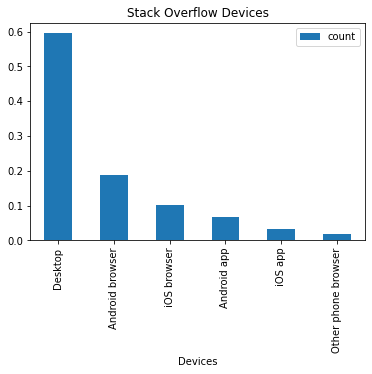

In [30]:
# Function a bar plot of 'Stack Overflow Devices'
devs_df = clean_and_plot_Devs(df1)

**c. Job Profile of Stack Overflow with users.**

In [31]:
# The data in JobProfile.
set(df1['JobProfile'].values)


# The results of the data in "JobProfile" columns.
job_prof = ["CW_Jobs", "Dice", "Glassdoor", "Hired.com", "Indeed", "JobSite.co.uk",
            "LinkedIn", "Monster", "Naukri", "Other", "Pracuj", "Reed.co.uk", "Remix_jobs",
            "StepStone", "Talent.io", "Total_Jobs", "TripleByte", "Workopolis", "Xing"]


# Function compute of the Job Profile data.
def clean_and_plot_Prof(df1, title='Job Profile', plot=True):
    '''
    INPUT 
        df - a dataframe holding the JobProfile column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the JobProfile column.
    '''
    
    # Create DataFrame.
    profile = df1['JobProfile'].value_counts().reset_index()
    profile.rename(columns={'index': 'Profile', 'JobProfile': 'count'}, inplace=True)
    
    # Import libary.
    from collections import defaultdict
    profile_df = defaultdict(int)

    # Value counts in the JobProfile columns.
    for val in job_prof:
        for idx in range(profile.shape[0]):
            if val in profile['Profile'][idx]:
                profile_df[val] += int(profile['count'][idx])
    
    # Data setting.
    profile_df = pd.DataFrame(pd.Series(profile_df)).reset_index()
    profile_df.columns = ['Profile', 'count']
    profile_df.sort_values('count', ascending=False, inplace=True)
    profile_df.set_index('Profile', inplace=True)

    # Graph plotting.
    if plot:
        (profile_df/profile_df.sum()).plot(kind='bar', legend=True);
        plt.title(title);
        plt.savefig('Picture/profile_df.png', facecolor='white', dpi=500 , bbox_inches='tight')
     
    # Ratio.
    props_profiles = profile_df/profile_df.sum()
    
    return props_profiles

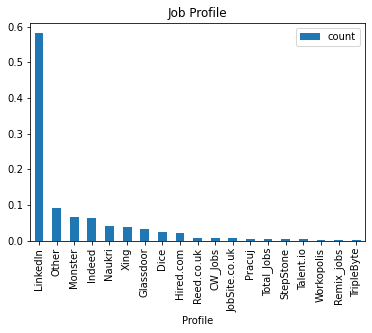

In [32]:
# Function a bar plot of 'Job Profile'
prof_df = clean_and_plot_Prof(df1)

## 2. User response comparison.

Create DataFrame using StackOverflow questionnaire data.

In [33]:
df1_StackOf = df1[['ImportantBenefits',
                   'StackOverflowAdsDistracting',
                   'StackOverflowAdsRelevant',
                   'StackOverflowAnswer',
                   'StackOverflowBetter',
                   'StackOverflowCommunity',
                   'StackOverflowCompanyPage',
                   'StackOverflowCopiedCode',
                   'StackOverflowDescribes',
                   'StackOverflowDevices',
                   'StackOverflowFoundAnswer',
                   'StackOverflowHelpful',
                   'StackOverflowJobListing',
                   'StackOverflowJobSearch',
                   'StackOverflowMakeMoney',
                   'StackOverflowMetaChat',
                   'StackOverflowModeration',
                   'StackOverflowNewQuestion',
                   'StackOverflowWhatDo',
                   'StackOverflowSatisfaction']]

Check the data in DataFrame by using `.head()`.

In [34]:
df1_StackOf.head(2)

,ImportantBenefits,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo,StackOverflowSatisfaction
0,Stock options; Vacation/days off; Remote options,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree,9.0
1,NaN,Strongly disagree,Disagree,Several times,Strongly agree,Strongly agree,Once or twice,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app; Android browser...,Several times,Agree,Once or twice,Once or twice,Strongly disagree,At least once each week,Strongly disagree,Haven't done at all,Strongly agree,8.0


Check number of rows and columns by using `.shape`.


In [35]:
df1_StackOf.shape

(51392, 20)

Clear data that is "NAN".

In [36]:
df1_StackOf = df1_StackOf.dropna(axis=0)
df1_StackOf.head(2)

,ImportantBenefits,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo,StackOverflowSatisfaction
0,Stock options; Vacation/days off; Remote options,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree,9.0
3,Stock options; Annual bonus; Health benefits; ...,Strongly disagree,Agree,At least once each day,Agree,Strongly agree,Several times,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,At least once each week,Strongly agree,At least once each week,At least once each week,Disagree,At least once each day,Strongly disagree,Several times,Strongly agree,10.0


Check the number of rows and columns by using `.shape` after dropping 'NAN'

In [37]:
df1_StackOf.shape

(18741, 20)

Check how often you answer questions of StackOverflowHelpful.

In [38]:
df1_StackOf['StackOverflowHelpful'].value_counts()

Agree                8849
Strongly agree       7969
Somewhat agree       1773
Disagree              105
Strongly disagree      45
Name: StackOverflowHelpful, dtype: int64

Separate information that is agree and disagree.

In [39]:
def StackOf_ed(StackOverflow_abount_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Stack Overflow column
    
    OUTPUT
        return 1 if the string is  in ("Strongly agree", "Agree", "Somewhat agree")
        return 0 if the string is  in ("Disagree", "Strongly disagree")
    
    '''
    if StackOverflow_abount_str in ("Strongly agree", "Agree", "Somewhat agree"):
        return 1
    else:
        return 0

Check the first 5 lines of information.

In [40]:
df1_StackOf["StackOverflowHelpful"].apply(StackOf_ed)[:5]

0    1
3    1
6    1
7    1
8    1
Name: StackOverflowHelpful, dtype: int64

Call for the meaning of Stack Overflow Helpful at df2 in the Question column.

In [41]:
df2['Question']["StackOverflowHelpful"]

'The answers and code examples I get on Stack Overflow are helpful'

Add column **StackOfHelpful** in DataFrame by using value at **StockOf_ed**

In [42]:
df1_StackOf["StackOfHelpful"] = df1_StackOf["StackOverflowHelpful"].apply(StackOf_ed)

In [43]:
df1_StackOf.head()

,ImportantBenefits,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,...,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo,StackOverflowSatisfaction,StackOfHelpful
0,Stock options; Vacation/days off; Remote options,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,...,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree,9.0,1
3,Stock options; Annual bonus; Health benefits; ...,Strongly disagree,Agree,At least once each day,Agree,Strongly agree,Several times,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,...,Strongly agree,At least once each week,At least once each week,Disagree,At least once each day,Strongly disagree,Several times,Strongly agree,10.0,1
6,Health benefits; Equipment; Professional devel...,Disagree,Somewhat agree,Several times,Strongly agree,Agree,Haven't done at all,Once or twice,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,...,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Disagree,Haven't done at all,Agree,8.0,1
7,Equipment; Professional development sponsorshi...,Disagree,Disagree,Several times,Agree,Somewhat agree,Haven't done at all,Once or twice,I have created a CV or Developer Story on Stac...,Desktop,...,Agree,Haven't done at all,Haven't done at all,Somewhat agree,Haven't done at all,Disagree,Haven't done at all,Disagree,7.0,1
8,Stock options; Annual bonus; Health benefits; ...,Disagree,Disagree,Once or twice,Strongly agree,Somewhat agree,Haven't done at all,Haven't done at all,"I have a login for Stack Overflow, but haven't...",Desktop; Android app,...,Agree,Haven't done at all,Haven't done at all,Strongly disagree,Haven't done at all,Disagree,Once or twice,Somewhat agree,8.0,1


Find the mean of StackOfHelpful column.

In [44]:
higher_ed_perc = df1_StackOf["StackOfHelpful"].mean()
higher_ed_perc

0.9919961581559148

**StackOfHelpful result is 1** ("Strongly agree", "Agree", "Somewhat agree")

In [45]:
ed_1 = df1_StackOf[df1_StackOf['StackOfHelpful'] == 1]
ed_1.shape

(18591, 21)

**StackOfHelpful result is 0** ("Disagree", "Strongly disagree")

In [46]:
ed_0 = df1_StackOf[df1_StackOf['StackOfHelpful'] == 0]
ed_0.shape

(150, 21)

Call function of *clean_and_plot* to sum data is **ed_1_perc**.

In [47]:
ed_1_perc = clean_and_plot(ed_1, 'Agree', plot=False)
ed_1_perc

,count
Benefits,
Vacation/days off,0.136359
Remote options,0.126046
Health benefits,0.109469
Expected work hours,0.104930
Equipment,0.098055
Professional development sponsorship,0.090286
Annual bonus,0.071764
Retirement,0.062589
Education sponsorship,0.039332


Call function of *clean_and_plot* to sum data is **ed_0_perc**.

In [48]:
ed_0_perc = clean_and_plot(ed_0, 'Disagree', plot=False)
ed_0_perc

,count
Benefits,
Remote options,0.119086
Vacation/days off,0.114192
Expected work hours,0.099511
Health benefits,0.094617
Professional development sponsorship,0.092985
Equipment,0.083197
Annual bonus,0.078303
Stock options,0.052202
Retirement,0.048940


Create DataFrame by merge the result between ed_1_prec and ed_0_prec

In [49]:
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']

Create new columns to different between ed_1_perc and ed_0_perc.

In [50]:
comp_df['Diff_AgreeAndDisagree_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']

**Visualization 1.**

Refer: [Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [51]:
comp_df.style.bar(subset=['Diff_AgreeAndDisagree_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])
#dfi.export(comp_df,"Picture/mytable1.png")

,ed_1_perc,ed_0_perc,Diff_AgreeAndDisagree_Vals
Benefits,,,
Vacation/days off,0.136359,0.114192,0.022167
Remote options,0.126046,0.119086,0.006960
Health benefits,0.109469,0.094617,0.014852
Expected work hours,0.104930,0.099511,0.005420
Equipment,0.098055,0.083197,0.014857
Professional development sponsorship,0.090286,0.092985,-0.002699
Annual bonus,0.071764,0.078303,-0.006539
Retirement,0.062589,0.048940,0.013649
Education sponsorship,0.039332,0.039152,0.000180


**Visualization 2.**

Refer: [Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [52]:
cm = sns.light_palette("green", as_cmap=True)
comp_df.style.background_gradient(cmap=cm)
#dfi.export(comp_df,"Picture/mytable2.png")

,ed_1_perc,ed_0_perc,Diff_AgreeAndDisagree_Vals
Benefits,,,
Vacation/days off,0.136359,0.114192,0.022167
Remote options,0.126046,0.119086,0.006960
Health benefits,0.109469,0.094617,0.014852
Expected work hours,0.104930,0.099511,0.005420
Equipment,0.098055,0.083197,0.014857
Professional development sponsorship,0.090286,0.092985,-0.002699
Annual bonus,0.071764,0.078303,-0.006539
Retirement,0.062589,0.048940,0.013649
Education sponsorship,0.039332,0.039152,0.000180


**Visualization 3.**

Refer: [Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [53]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = comp_df.style.applymap(style_negative, props='color:red;').applymap(lambda v: 'opacity: 20%;' if (v < 0.001) and (v > -0.001) else None)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

#dfi.export(s2,"Picture/mytable3.png")

,ed_1_perc,ed_0_perc,Diff_AgreeAndDisagree_Vals
Benefits,,,
Vacation/days off,0.136359,0.114192,0.022167
Remote options,0.126046,0.119086,0.006960
Health benefits,0.109469,0.094617,0.014852
Expected work hours,0.104930,0.099511,0.005420
Equipment,0.098055,0.083197,0.014857
Professional development sponsorship,0.090286,0.092985,-0.002699
Annual bonus,0.071764,0.078303,-0.006539
Retirement,0.062589,0.048940,0.013649
Education sponsorship,0.039332,0.039152,0.000180


**Visualization 4.**

Refer: [Table Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [54]:
comp_df.style.bar(subset=['ed_1_perc', 'ed_0_perc', 'Diff_AgreeAndDisagree_Vals'], color='#d65f5f')
#dfi.export(comp_df,"Picture/mytable4.png")

,ed_1_perc,ed_0_perc,Diff_AgreeAndDisagree_Vals
Benefits,,,
Vacation/days off,0.136359,0.114192,0.022167
Remote options,0.126046,0.119086,0.006960
Health benefits,0.109469,0.094617,0.014852
Expected work hours,0.104930,0.099511,0.005420
Equipment,0.098055,0.083197,0.014857
Professional development sponsorship,0.090286,0.092985,-0.002699
Annual bonus,0.071764,0.078303,-0.006539
Retirement,0.062589,0.048940,0.013649
Education sponsorship,0.039332,0.039152,0.000180


## 3. Correlation of data prediction.

Create DataFrame using StackOverflow questionnaire data.

In [55]:
df1_satis = df1[['StackOverflowAdsDistracting',
                 'StackOverflowAdsRelevant',
                 'StackOverflowAnswer',
                 'StackOverflowBetter',
                 'StackOverflowCommunity',
                 'StackOverflowCompanyPage',
                 'StackOverflowCopiedCode',
                 'StackOverflowDescribes',
                 'StackOverflowDevices',
                 'StackOverflowFoundAnswer',
                 'StackOverflowHelpful',
                 'StackOverflowJobListing',
                 'StackOverflowJobSearch',
                 'StackOverflowMakeMoney',
                 'StackOverflowMetaChat',
                 'StackOverflowModeration',
                 'StackOverflowNewQuestion',
                 'StackOverflowWhatDo',
                 'StackOverflowSatisfaction']]

In [56]:
df1_satis.head()

,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo,StackOverflowSatisfaction
0,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree,9.0
1,Strongly disagree,Disagree,Several times,Strongly agree,Strongly agree,Once or twice,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app; Android browser...,Several times,Agree,Once or twice,Once or twice,Strongly disagree,At least once each week,Strongly disagree,Haven't done at all,Strongly agree,8.0
2,Disagree,Disagree,At least once each day,Agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Once or twice,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Strongly disagree,Haven't done at all,Agree,8.0
3,Strongly disagree,Agree,At least once each day,Agree,Strongly agree,Several times,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,At least once each week,Strongly agree,At least once each week,At least once each week,Disagree,At least once each day,Strongly disagree,Several times,Strongly agree,10.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df1_satis.shape

(51392, 19)

Clear data that is "NAN".

In [58]:
df1_satis = df1_satis.dropna(axis=0)
df1_satis.head()

,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo,StackOverflowSatisfaction
0,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree,9.0
1,Strongly disagree,Disagree,Several times,Strongly agree,Strongly agree,Once or twice,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app; Android browser...,Several times,Agree,Once or twice,Once or twice,Strongly disagree,At least once each week,Strongly disagree,Haven't done at all,Strongly agree,8.0
2,Disagree,Disagree,At least once each day,Agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Once or twice,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Strongly disagree,Haven't done at all,Agree,8.0
3,Strongly disagree,Agree,At least once each day,Agree,Strongly agree,Several times,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,At least once each week,Strongly agree,At least once each week,At least once each week,Disagree,At least once each day,Strongly disagree,Several times,Strongly agree,10.0
6,Disagree,Somewhat agree,Several times,Strongly agree,Agree,Haven't done at all,Once or twice,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Several times,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Disagree,Haven't done at all,Agree,8.0


Create DataFrame to selection is object type.

In [59]:
cat_df = df1_satis.select_dtypes(include=['object'])
cat_df.head()

,StackOverflowAdsDistracting,StackOverflowAdsRelevant,StackOverflowAnswer,StackOverflowBetter,StackOverflowCommunity,StackOverflowCompanyPage,StackOverflowCopiedCode,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowHelpful,StackOverflowJobListing,StackOverflowJobSearch,StackOverflowMakeMoney,StackOverflowMetaChat,StackOverflowModeration,StackOverflowNewQuestion,StackOverflowWhatDo
0,Strongly disagree,Somewhat agree,Several times,Strongly agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS app,At least once each week,Agree,Once or twice,Haven't done at all,Strongly disagree,Once or twice,Strongly disagree,Several times,Strongly agree
1,Strongly disagree,Disagree,Several times,Strongly agree,Strongly agree,Once or twice,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app; Android browser...,Several times,Agree,Once or twice,Once or twice,Strongly disagree,At least once each week,Strongly disagree,Haven't done at all,Strongly agree
2,Disagree,Disagree,At least once each day,Agree,Strongly agree,Haven't done at all,Haven't done at all,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Once or twice,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Strongly disagree,Haven't done at all,Agree
3,Strongly disagree,Agree,At least once each day,Agree,Strongly agree,Several times,Several times,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,At least once each week,Strongly agree,At least once each week,At least once each week,Disagree,At least once each day,Strongly disagree,Several times,Strongly agree
6,Disagree,Somewhat agree,Several times,Strongly agree,Agree,Haven't done at all,Once or twice,I have created a CV or Developer Story on Stac...,Desktop; iOS browser; iOS app,Several times,Agree,Haven't done at all,Haven't done at all,Disagree,At least once each day,Disagree,Haven't done at all,Agree


Select columns is object type.

In [60]:
cat_cols_lst = cat_df.columns
cat_cols = cat_cols_lst
cat_cols

Index(['StackOverflowAdsDistracting', 'StackOverflowAdsRelevant',
       'StackOverflowAnswer', 'StackOverflowBetter', 'StackOverflowCommunity',
       'StackOverflowCompanyPage', 'StackOverflowCopiedCode',
       'StackOverflowDescribes', 'StackOverflowDevices',
       'StackOverflowFoundAnswer', 'StackOverflowHelpful',
       'StackOverflowJobListing', 'StackOverflowJobSearch',
       'StackOverflowMakeMoney', 'StackOverflowMetaChat',
       'StackOverflowModeration', 'StackOverflowNewQuestion',
       'StackOverflowWhatDo'],
      dtype='object')

Create dummy columns for each of the categorical columns follows by cat_cols.

In [61]:
for col in  cat_cols:
    df1_satis = pd.concat([df1_satis.drop(col, axis=1), pd.get_dummies(df1_satis[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [62]:
# Check the result in the dataframe.
df1_satis.head()

,StackOverflowSatisfaction,StackOverflowAdsDistracting_Disagree,StackOverflowAdsDistracting_Somewhat agree,StackOverflowAdsDistracting_Strongly agree,StackOverflowAdsDistracting_Strongly disagree,StackOverflowAdsRelevant_Disagree,StackOverflowAdsRelevant_Somewhat agree,StackOverflowAdsRelevant_Strongly agree,StackOverflowAdsRelevant_Strongly disagree,StackOverflowAnswer_At least once each week,...,StackOverflowModeration_Strongly agree,StackOverflowModeration_Strongly disagree,StackOverflowNewQuestion_At least once each week,StackOverflowNewQuestion_Haven't done at all,StackOverflowNewQuestion_Once or twice,StackOverflowNewQuestion_Several times,StackOverflowWhatDo_Disagree,StackOverflowWhatDo_Somewhat agree,StackOverflowWhatDo_Strongly agree,StackOverflowWhatDo_Strongly disagree
0,9.0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,8.0,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,8.0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,10.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,8.0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
# Check the number of rows and columns.
df1_satis.shape

(25462, 112)

In [64]:
# Split the column of 'StackOverflowSatisfaction'.
X = df1_satis.drop(['StackOverflowSatisfaction'],axis=1)

In [65]:
# Create column into response variables.
y = df1_satis['StackOverflowSatisfaction']

In [66]:
# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [67]:
# Check the data in X_train to first 5 rows.
X_train.head()

,StackOverflowAdsDistracting_Disagree,StackOverflowAdsDistracting_Somewhat agree,StackOverflowAdsDistracting_Strongly agree,StackOverflowAdsDistracting_Strongly disagree,StackOverflowAdsRelevant_Disagree,StackOverflowAdsRelevant_Somewhat agree,StackOverflowAdsRelevant_Strongly agree,StackOverflowAdsRelevant_Strongly disagree,StackOverflowAnswer_At least once each week,StackOverflowAnswer_Haven't done at all,...,StackOverflowModeration_Strongly agree,StackOverflowModeration_Strongly disagree,StackOverflowNewQuestion_At least once each week,StackOverflowNewQuestion_Haven't done at all,StackOverflowNewQuestion_Once or twice,StackOverflowNewQuestion_Several times,StackOverflowWhatDo_Disagree,StackOverflowWhatDo_Somewhat agree,StackOverflowWhatDo_Strongly agree,StackOverflowWhatDo_Strongly disagree
29290,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
49947,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4573,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
32759,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
32717,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [68]:
# Check the data in X_test to first 5 rows.
X_test.head()

,StackOverflowAdsDistracting_Disagree,StackOverflowAdsDistracting_Somewhat agree,StackOverflowAdsDistracting_Strongly agree,StackOverflowAdsDistracting_Strongly disagree,StackOverflowAdsRelevant_Disagree,StackOverflowAdsRelevant_Somewhat agree,StackOverflowAdsRelevant_Strongly agree,StackOverflowAdsRelevant_Strongly disagree,StackOverflowAnswer_At least once each week,StackOverflowAnswer_Haven't done at all,...,StackOverflowModeration_Strongly agree,StackOverflowModeration_Strongly disagree,StackOverflowNewQuestion_At least once each week,StackOverflowNewQuestion_Haven't done at all,StackOverflowNewQuestion_Once or twice,StackOverflowNewQuestion_Several times,StackOverflowWhatDo_Disagree,StackOverflowWhatDo_Somewhat agree,StackOverflowWhatDo_Strongly agree,StackOverflowWhatDo_Strongly disagree
40273,0,0,0,1,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
49984,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
18440,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
23875,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
35597,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [69]:
# Check the data in y_train to first 5 rows.
y_train.head()

29290     9.0
49947     9.0
4573      5.0
32759     8.0
32717    10.0
Name: StackOverflowSatisfaction, dtype: float64

In [70]:
# Check the data in y_test to first 5 rows.
y_test.head()

40273    10.0
49984     9.0
18440     8.0
23875     7.0
35597     8.0
Name: StackOverflowSatisfaction, dtype: float64

In [71]:
# Instantiate
lm_model = LinearRegression(normalize=True)
lm_model

LinearRegression(normalize=True)

In [72]:
# Fit
lm_model.fit(X_train, y_train)

/Users/natnareephoungsombat/opt/anaconda3/envs/DataTest/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [73]:
# Predict model.
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [74]:
# Score of model.
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [75]:
# Result of y_test_preds.
y_test_preds

array([8.79949322, 9.69608959, 7.74260384, ..., 9.48909888, 9.30040569,
       8.86600702])

In [76]:
# Result of y_train_preds.
y_train_preds

array([9.58482276, 7.57312293, 6.13364526, ..., 8.52537716, 9.15277564,
       9.22988921])

In [77]:
# Test score result of model.
test_score

-3.3857688081531657e+25

In [78]:
# Train score result of model.
train_score

0.3827883211550498

In [79]:
#Create dataframe to df_y_test_preds
df_y_test_preds = pd.DataFrame(y_test_preds)
df_y_test_preds.rename(columns={0: 'y_test_preds'}, inplace=True)

In [80]:
# Check dataframe.
df_y_test_preds.head()

,y_test_preds
0,8.799493
1,9.696090
2,7.742604
3,7.457461
4,8.398339


In [81]:
#Create dataframe to df_y_train_preds
df_y_train_preds = pd.DataFrame(y_train_preds)
df_y_train_preds.rename(columns={0: 'y_train_preds'}, inplace=True)

In [82]:
# Check dataframe.
df_y_train_preds.head()

,y_train_preds
0,9.584823
1,7.573123
2,6.133645
3,7.310758
4,9.293373


In [83]:
# Merge dataframe.
df_preds = pd.merge(df_y_test_preds, df_y_train_preds, left_index=True, right_index=True)

In [84]:
# Check result.
df_preds.head()

,y_test_preds,y_train_preds
0,8.799493,9.584823
1,9.696090,7.573123
2,7.742604,6.133645
3,7.457461,7.310758
4,8.398339,9.293373


**Visualization 1**

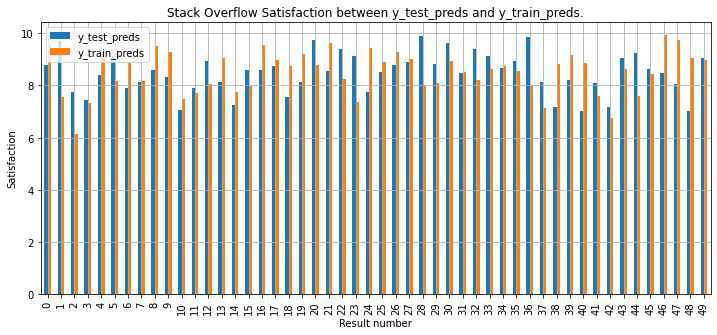

In [85]:
df_preds[:50].plot(kind='bar', figsize=(12,5), grid=True, fontsize=10)
plt.title("Stack Overflow Satisfaction between y_test_preds and y_train_preds.")
plt.xlabel("Result number")
plt.ylabel("Satisfaction")
plt.savefig('Picture/Satisfaction_vis1.png', facecolor='white', dpi=500 , bbox_inches='tight')

**Visualization 2**

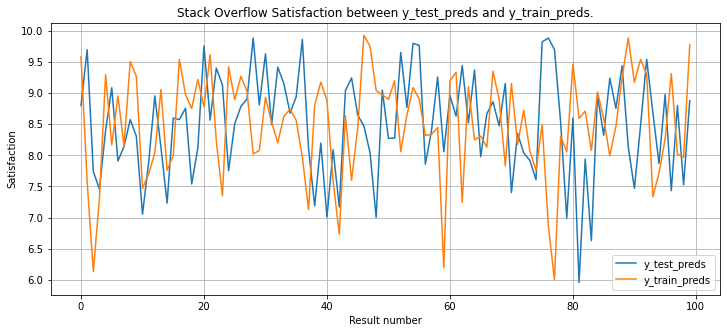

In [86]:
df_preds[:100].plot(kind='line', figsize=(12,5), grid=True, fontsize=10)
plt.title("Stack Overflow Satisfaction between y_test_preds and y_train_preds.")
plt.xlabel("Result number")
plt.ylabel("Satisfaction")
plt.savefig('Picture/Satisfaction_vis2.png', facecolor='white', dpi=500 , bbox_inches='tight')

**Visualization 3**

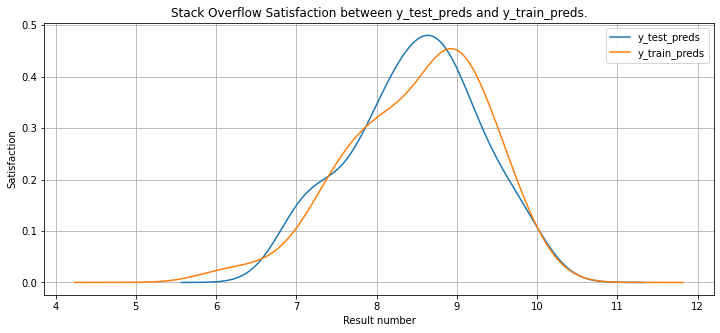

In [87]:
df_preds[:50].plot(kind='kde', figsize=(12,5), grid=True, fontsize=10)
plt.title("Stack Overflow Satisfaction between y_test_preds and y_train_preds.")
plt.xlabel("Result number")
plt.ylabel("Satisfaction")
plt.savefig('Picture/Satisfaction_vis3.png', facecolor='white', dpi=500 , bbox_inches='tight')